In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [47]:
df=pd.read_csv('merged_exercise_data.csv')
print(df.head())
print(f"Number of rows : {len(df)}")

    User_ID  Calories  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0  14733363     231.0    male   68   190.0    94.0      29.0       105.0   
1  14861698      66.0  female   20   166.0    60.0      14.0        94.0   
2  11179863      26.0    male   69   179.0    79.0       5.0        88.0   
3  16180408      71.0  female   34   179.0    71.0      13.0       100.0   
4  17771927      35.0  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  
0       40.8  
1       40.3  
2       38.7  
3       40.5  
4       39.8  
Number of rows : 15000


In [48]:

df_clean = df.dropna(subset=[ 'Calories'])
print(f"Number of rows after dropping NaN: {len(df_clean)}")

Number of rows after dropping NaN: 15000


In [49]:
df_clean.shape

(15000, 9)

Check summary statistics to see the cleaned data

In [50]:
df_clean.describe()

,User_ID,Calories,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,89.539533,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453
std,2.872851e+06,62.456978,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230
min,1.000116e+07,1.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000
25%,1.247419e+07,35.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,1.499728e+07,79.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000
75%,1.744928e+07,138.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,1.999965e+07,314.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [51]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


Exploratory Data Analysis

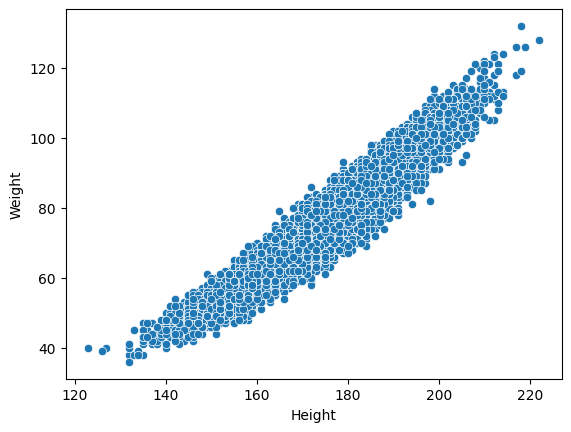

In [52]:
sb.scatterplot(x='Height', y='Weight', data=df) 
plt.show()


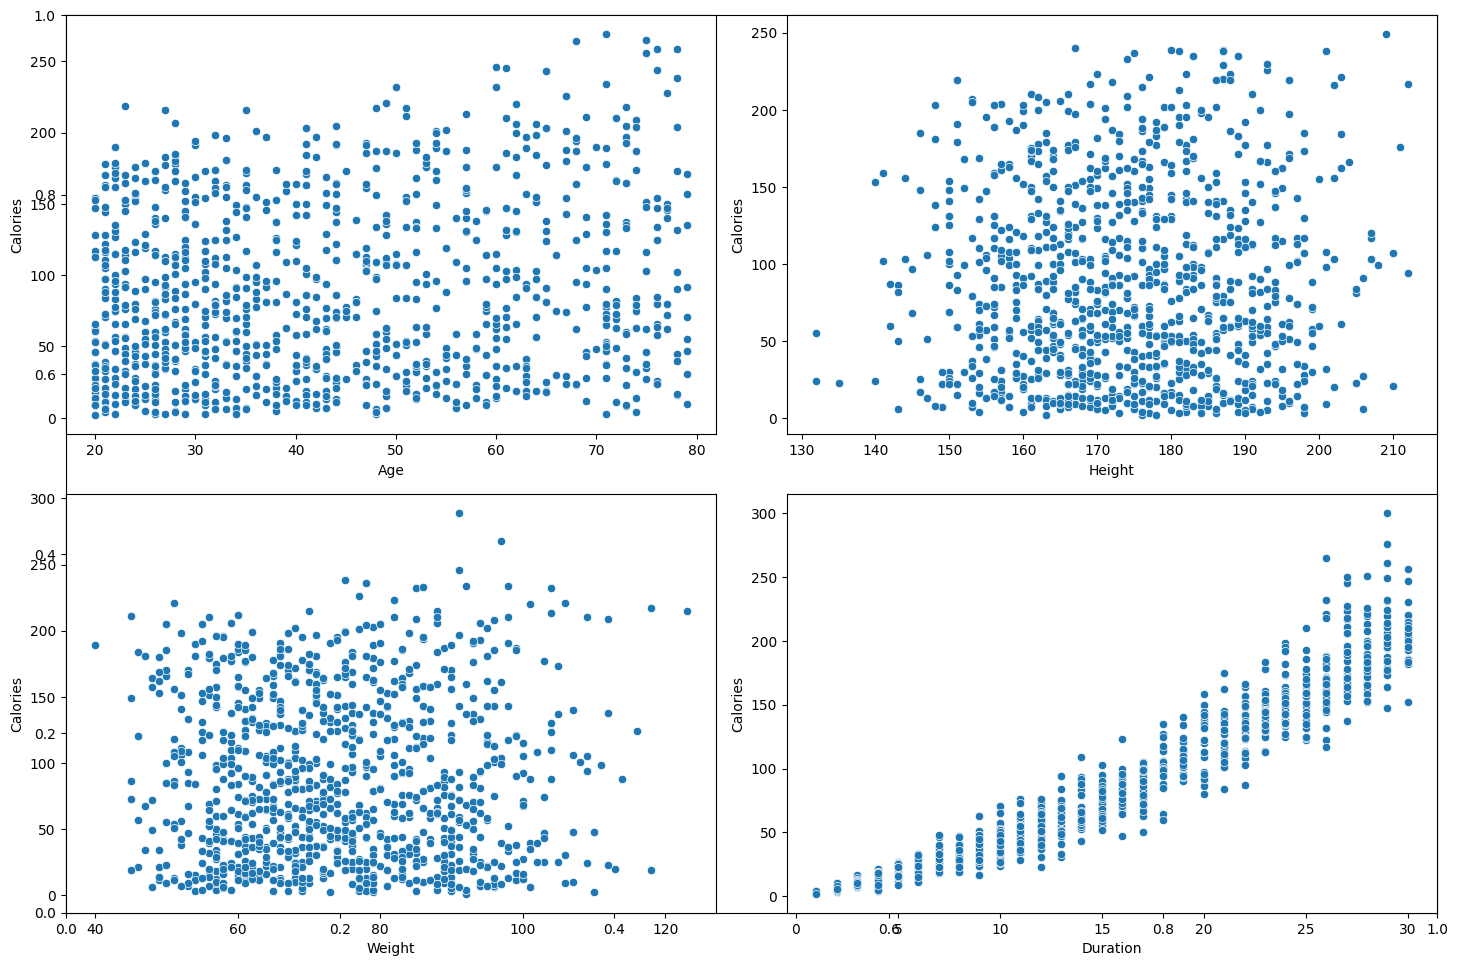

In [53]:
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()



C:\Users\Adio\AppData\Local\Temp\ipykernel_13872\2019077125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Adio\AppData\Local\Temp\ipykernel_13872\2019077125.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[col])
C:\Users\Adio\AppData\Local\Temp\ipykernel_13872\2019077

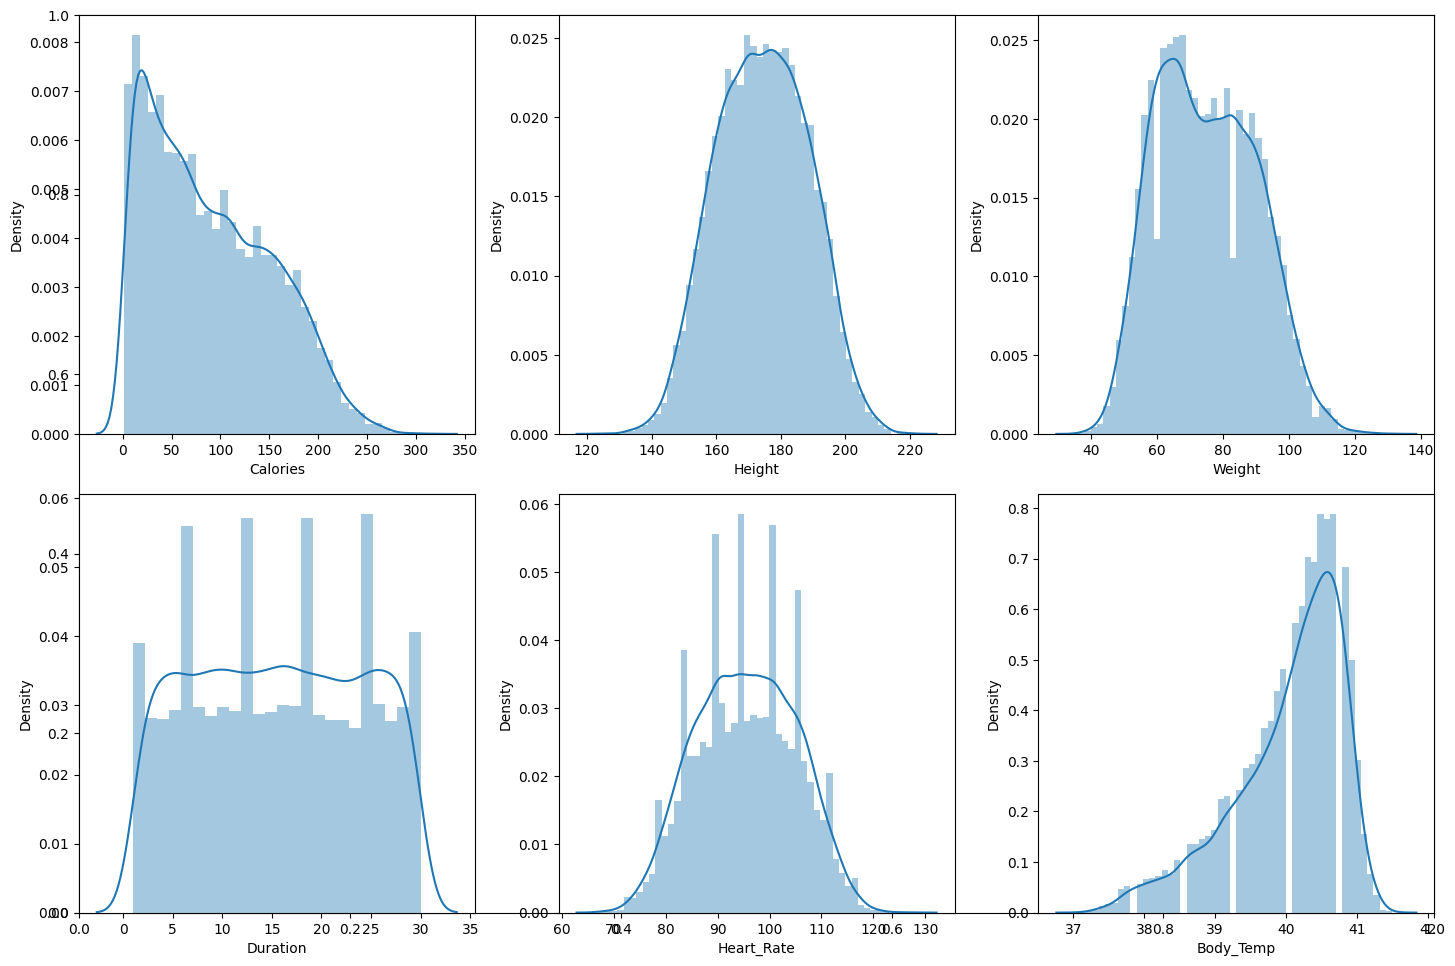

In [54]:
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.distplot(df[col])
plt.tight_layout()
plt.show()

model training

In [55]:
features = df.drop(['User_ID', 'Calories'], axis=1)
target = df['Calories'].values

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.1,
                                      random_state=22)
X_train.shape, X_val.shape

((13500, 7), (1500, 7))

In [ ]:
# One-hot encode the categorical variables
features = pd.get_dummies(df.drop(['User_ID', 'Calories'], axis=1))
target = df['Calories'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                                 test_size=0.1,
                                                 random_state=22)

# Train and evaluate the model
from sklearn.metrics import mean_absolute_error as mae
models = LinearRegression()
models.fit(X_train, Y_train)

print(f'{models} : ')
train_preds = models.predict(X_train)
print('Training Error : ', mae(Y_train, train_preds))
val_preds = models.predict(X_val) 
print('Validation Error : ', mae(Y_val, val_preds))
print()

LinearRegression() : 
Training Error :  8.345892439192397
Validation Error :  8.410690094668832

